In [2]:
# import relevant packages
import pandas as pd
from pandas_profiling import ProfileReport as pr
from datetime import datetime
import numpy as np

# BusinessCase_Custs.csv

In [3]:
# EDA with Pandas Profiling
df_cust = pd.read_csv('BusinessCase_Custs.csv')
pr(df_cust, minimal=True)

In [4]:
# drop columns 'type' and 'addresses_principalResidence_province' due to constant values
# drop columns 'schools' and 'schoolAttendance' due to >70% missing values
df_cust_trimmed = df_cust[['id','gender', 'birthDate', 'workActivity',
       'occupationIndustry', 'totalIncome', 'relationshipStatus',
       'habitationStatus']]

# convert birthDate column to Age Column and remove birthDate Column
df_cust_trimmed['birthDate'] = pd.to_datetime(df_cust_trimmed['birthDate'])

now = datetime(2020, 3, 3, 23, 11, 35, 806811)
df_cust_trimmed['age'] = (now - df_cust_trimmed['birthDate']).astype('<m8[Y]').astype('int64')

df_cust_trimmed_2 = df_cust_trimmed[['id','gender', 'workActivity', 'occupationIndustry',
       'totalIncome', 'relationshipStatus', 'habitationStatus', 'age']]

# what df_cust looks like now
df_cust_trimmed_2.head()

C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,id,gender,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,age
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Male,NaN,NaN,0.0,Single,Group,34
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Female,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,43
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Female,NaN,NaN,0.0,Single,With Parent,16
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Other,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,36
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Male,fulltime,4855 Charter bus industry,21496.0,Single,With Parent,37


In [5]:
# fill any remaining missing value as 'unspecified'
df_cust_filled = df_cust_trimmed_2.fillna('unspecified')
df_cust_filled.head()

,id,gender,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,age
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Male,unspecified,unspecified,0.0,Single,Group,34
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Female,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,43
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Female,unspecified,unspecified,0.0,Single,With Parent,16
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Other,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,36
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Male,fulltime,4855 Charter bus industry,21496.0,Single,With Parent,37


In [6]:
# convert each feature into the proper type
print(df_cust_filled.dtypes)
df_cust_filled.gender = df_cust_filled.gender.astype("category")
df_cust_filled.workActivity = df_cust_filled.workActivity.astype("category")
df_cust_filled.occupationIndustry = df_cust_filled.occupationIndustry.astype("category")
df_cust_filled.relationshipStatus = df_cust_filled.relationshipStatus.astype("category")
df_cust_filled.habitationStatus = df_cust_filled.habitationStatus.astype("category")
print(df_cust_filled.dtypes)

id                     object
gender                 object
workActivity           object
occupationIndustry     object
totalIncome           float64
relationshipStatus     object
habitationStatus       object
age                     int64
dtype: object
id                      object
gender                category
workActivity          category
occupationIndustry    category
totalIncome            float64
relationshipStatus    category
habitationStatus      category
age                      int64
dtype: object


In [7]:
# final form
print(df_cust_filled.shape)
df_cust_filled.head()

(5645, 8)


,id,gender,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,age
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Male,unspecified,unspecified,0.0,Single,Group,34
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Female,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,43
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Female,unspecified,unspecified,0.0,Single,With Parent,16
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Other,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,36
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Male,fulltime,4855 Charter bus industry,21496.0,Single,With Parent,37


# BusinessCase_Accts.csv

In [8]:
# load the accounts dataframe
df_acc = pd.read_csv('BusinessCase_Accts.csv')

# print unique values for each column if that column has less than 1000 unique values
for col in df_acc:
    if len(df_acc[col].unique()) < 1000:
        print('Column:',col)
        print(df_acc[col].unique())
        print('\n')
        
# drop column 'openDate','iban','currency' due to low variance
# drop column 'Unnamed: 0' due to lack of meaning
df_acc_trimmed = df_acc[['type','branchNumber', 'id', 'balance', 'cust_id']]

# visualize what the dataframe looks like now
df_acc_trimmed.head()

Column: branchNumber
[ 1416   324  1728  1592  1304   392   235  1857   571   331   320   330
   328 12082   607  1440  1458  1636  1480  1529  1195  1923    31  1736
  1512   193  1672 13972  1844   543  1246 12020  1175  1924 11653  1033
   538  1337   241  1459   532    87 12180   252   153  1550   327   374
  1198  1795  1080  1800    51   231  1640  1354  1444   531  1584  1832
   255 12684 15004 10331 12831  1882  1828   197  1144   329 12938  1076
  1282   326  1929  1992   321 12324  1018   522  1576  1967  1928 11427
    32  1952  1476   507  1760 13852  1256  1976   132  1740  1249  1968
 12888   335  1029   658 12934  1336  1790 11679 12493  1864 12997   233
  1704   677   253  1872 11754   575  1376  1223  1580 11572 15016  1168
  1791 13974 12081  1988   251  1544   540  1552   375  1824   573   265
 15034  1015 13181  1084  1590    48   315 12676  1970   262  1284 11372
   337 12541  1104    50  1488  1918  1595  1984 13189  1220  1289  1637
  1040   500  1224 12238  1993

,type,branchNumber,id,balance,cust_id
0,DDA,1416,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,447.56,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
1,SDA,1416,fe51c153-fbec-4b64-9b00-2530035ef0e1_e4d4cce1-...,4592.68,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
2,DDA,324,fe51c153-fbec-4b64-9b00-2530035ef0e1_b4c1aad5-...,4132.75,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
3,SDA,324,fe51c153-fbec-4b64-9b00-2530035ef0e1_f71001df-...,2110.26,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
4,DDA,1728,fe51c153-fbec-4b64-9b00-2530035ef0e1_ec10146d-...,16981.85,fe51c153-fbec-4b64-9b00-2530035ef0e1_9ed43d58-...


In [9]:
# check and see if there are any null values
df_acc_null = df_acc_trimmed[df_acc_trimmed.isnull().any(axis=1)]
df_acc_null

,type,branchNumber,id,balance,cust_id


In [10]:
# pivot table such that each row is a customer id and the features are balances of DDA and SDA accounts
df_acc_pivoted_type = df_acc_trimmed.pivot(index='cust_id',values='balance', columns='type')
df_acc_pivoted_type = df_acc_pivoted_type.reset_index()
df_acc_pivoted_type.columns = ['cust_id','DDA_balance','SDA_balance']
print(df_acc_pivoted_type.shape)
df_acc_pivoted_type.head()

(5645, 3)


,cust_id,DDA_balance,SDA_balance
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,447.73,5708.64
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,8042.26,4334.72
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,799.65,125.30
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,7859.06,22535.80
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,3450.16,10599.84


In [11]:
# pivot table such that each row is a customer id and the features are ids of DDA and SDA accounts
df_acc_pivoted_id = df_acc_trimmed.pivot(index='cust_id',values='id', columns='type')
df_acc_pivoted_id = df_acc_pivoted_id.reset_index()
df_acc_pivoted_id.columns = ['cust_id','DDA_id','SDA_id']
print(df_acc_pivoted_id.shape)
df_acc_pivoted_id.head()

(5645, 3)


,cust_id,DDA_id,SDA_id
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0a377c5a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_146b5432-...
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0e8d214a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_e2d02cfc-...
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_ceb546ca-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7dcbd6c8-...
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7d8b7a0d-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_48b8336d-...
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_04e3fb9a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_dae6b54b-...


In [12]:
# merge the 2 tables above together on cust_id
df_acc_pivoted_merged = df_acc_pivoted_id.merge(df_acc_pivoted_type, on='cust_id')
print(df_acc_pivoted_merged.shape)
df_acc_pivoted_merged.head()

(5645, 5)


,cust_id,DDA_id,SDA_id,DDA_balance,SDA_balance
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0a377c5a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_146b5432-...,447.73,5708.64
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0e8d214a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_e2d02cfc-...,8042.26,4334.72
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_ceb546ca-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7dcbd6c8-...,799.65,125.30
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7d8b7a0d-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_48b8336d-...,7859.06,22535.80
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_04e3fb9a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_dae6b54b-...,3450.16,10599.84


In [13]:
# convert each feature into the proper type if needed
print(df_acc_pivoted_merged.dtypes)

cust_id         object
DDA_id          object
SDA_id          object
DDA_balance    float64
SDA_balance    float64
dtype: object


In [14]:
# final form
print(df_acc_pivoted_merged.shape)
df_acc_pivoted_merged.head()

(5645, 5)


,cust_id,DDA_id,SDA_id,DDA_balance,SDA_balance
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0a377c5a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_146b5432-...,447.73,5708.64
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0e8d214a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_e2d02cfc-...,8042.26,4334.72
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_ceb546ca-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7dcbd6c8-...,799.65,125.30
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7d8b7a0d-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_48b8336d-...,7859.06,22535.80
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_04e3fb9a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_dae6b54b-...,3450.16,10599.84


# BusinessCase_Tx.csv

In [51]:
# load the accounts dataframe
df_txn = pd.read_csv('BusinessCase_Tx.csv')

# print unique values for each column if that column has less than 1000 unique values
for col in df_txn:
    if len(df_txn[col].unique()) < 50:
        print('Column:',col)
        print(df_txn[col].unique())
        print('\n')

# drop column 'locationRegion','locationCity' due to low variance
# drop column 'Unnamed: 0' due to lack of meaning
df_txn_trimmed = df_txn[['description', 'currencyAmount', 'originationDateTime', 'customerId', 'merchantId',
                        'accountId', 'categoryTags']]

Column: locationRegion
[nan]


Column: locationCity
[nan]


Column: categoryTags
['Income' 'Bills and Utilities' 'Food and Dining' 'Transfer'
 'Mortgage and Rent' 'Entertainment' 'Taxes' 'Shopping' 'Travel' 'Home'
 nan 'Fees and Charges' 'Auto and Transport' 'Health and Fitness' 'Kids']




In [52]:
# drop any completely duplicated column
df_txn_trimmed.drop_duplicates(inplace=True)

# visualize what the dataframe looks like now
print(df_txn_trimmed.shape)
df_txn_trimmed.head()

(92169, 7)


C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,description,currencyAmount,originationDateTime,customerId,merchantId,accountId,categoryTags
0,ADP PMT 59964899,1092.22,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_5b35142d-...,Income
1,ADP PMT 78870688,701.11,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_9172eb97-...,Income
2,ROGERS CABLE E2I6X9,111.98,2018-04-30T00:00:00.002Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
3,TIM HORTONS #990 _F,1.16,2018-10-09T15:30:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,7cc23aa6-0671-4c44-a1b5-b8a98d4bc5d4,fe51c153-fbec-4b64-9b00-2530035ef0e1_1185d0e2-...,Food and Dining
4,EMAIL TFR C0***oHp,41.00,2018-07-05T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_bf889f32-...,Transfer


In [53]:
# check and see which columns contains null values
df_txn_trimmed.columns[df_txn_trimmed.isna().any()].tolist()

['merchantId', 'categoryTags']

In [54]:
# whenever categoryTags is null the description is always Pay Day Loan PMT
mask = (df_txn_trimmed.categoryTags.isna())
df_txn_trimmed[mask].description.unique()

array(['Pay Day Loan PMT'], dtype=object)

In [55]:
# set all categoryTags and description of Pay Day Loan transactions to PDL
df_txn_trimmed[mask] = df_txn_trimmed[mask].fillna('PDL')

C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Grace\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
# whenever merchantId is null the categoryTags is always Income, Transfer, Mortgage and Rent, or Taxes
mask = (df_txn_trimmed.merchantId.isna())
df_txn_trimmed[mask].categoryTags.unique()

array(['Income', 'Transfer', 'Mortgage and Rent', 'Taxes'], dtype=object)

In [59]:
# drop columns merchantId, description because they provide too granular of information
df_txn_trimmed2 = df_txn_trimmed[['currencyAmount', 'originationDateTime', 'customerId', 'accountId', 'categoryTags']]
df_txn_trimmed2.head()

,currencyAmount,originationDateTime,customerId,accountId,categoryTags
0,1092.22,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_5b35142d-...,Income
1,701.11,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_9172eb97-...,Income
2,111.98,2018-04-30T00:00:00.002Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
3,1.16,2018-10-09T15:30:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_1185d0e2-...,Food and Dining
4,41.00,2018-07-05T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_bf889f32-...,Transfer


In [60]:
# convert originationDateTime column to datetime format
df_txn_trimmed2['originationDateTime'] = pd.to_datetime(df_txn_trimmed2['originationDateTime'],format='%Y/%m/%d')

C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
# this transactional dataset is covering 232 days
(df_txn_trimmed2.originationDateTime.max() - df_txn_trimmed2.originationDateTime.min())

Timedelta('232 days 19:41:00')

In [63]:
# drop any rows with 0 as transaction value
df_txn_trimmed2 = df_txn_trimmed2[df_txn_trimmed2.currencyAmount!=0]
df_txn_trimmed2.reset_index(drop=True,inplace=True)

df_txn_trimmed2

,currencyAmount,originationDateTime,customerId,accountId,categoryTags
0,1092.22,2018-06-28 00:00:00.001000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_5b35142d-...,Income
1,701.11,2018-06-28 00:00:00.001000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_9172eb97-...,Income
2,111.98,2018-04-30 00:00:00.002000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
3,1.16,2018-10-09 15:30:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_1185d0e2-...,Food and Dining
4,41.00,2018-07-05 00:00:00.001000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_bf889f32-...,Transfer
...,...,...,...,...,...
90348,7.41,2018-05-04 12:39:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_0138b39d-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_c4af555d-...,Food and Dining
90349,113.42,2018-05-07 00:00:00.001000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_975020be-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_06d7a8a4-...,Bills and Utilities
90350,3484.64,2018-05-03 00:00:00.001000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_971442e4-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_68d13aae-...,Income
90351,5.91,2018-07-12 07:46:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_c68e5395-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_c2bbffb1-...,Food and Dining


## get amount spent/earned per month for each customer

In [64]:
# drop accountId column
# drop originationDateTime because it is too granular and I already know the total duration of this dataset
df_txn_trimmed_amount = df_txn_trimmed2[['currencyAmount', 'customerId', 'categoryTags']]

# pivot table such that each row is a account id and the features monthly averages of amounts for each category
df_txn_pivoted_amount = df_txn_trimmed_amount.groupby(by=['customerId','categoryTags']).sum()*30.0/232.0
df_txn_pivoted_amount = df_txn_pivoted_amount.reset_index()
df_txn_pivoted_amount2 = df_txn_pivoted_amount.pivot(index='customerId', columns='categoryTags', values='currencyAmount')
df_txn_pivoted_amount2 = df_txn_pivoted_amount2.reset_index()

# rename column names to add _monthly_sum at the end of every category
column_names = df_txn_pivoted_amount2.columns.tolist()
new_column_names = []
for item in df_txn_pivoted_amount2.columns.tolist():
    if item != 'customerId':
        new_term = item.replace(' ','_') + '_monthly_sum'
    else:
        new_term = item
    new_column_names.append(new_term)
df_txn_pivoted_amount2.columns = new_column_names

#fill null values with 0.0 since the sum is 0
df_txn_pivoted_amount2 = df_txn_pivoted_amount2.fillna(0.0)

# print unique values for each column if that column has less than 50 unique values
for col in df_txn_pivoted_amount2:
    if len(df_txn_pivoted_amount2[col].unique()) < 50:
        print('Column:',col)
        print(df_txn_pivoted_amount2[col].unique())
        print('\n')

Column: Auto_and_Transport_monthly_sum
[ 0.         11.48793103 31.97974138 11.63275862 19.19094828 20.53060345
 23.75560345]


Column: Entertainment_monthly_sum
[ 0.         16.80905172  9.66594828 31.26982759 22.56594828  9.04655172]


Column: Health_and_Fitness_monthly_sum
[ 0.         23.77241379  6.94525862]


Column: Kids_monthly_sum
[ 0.         43.18060345]




In [65]:
# note that this is 5645-5482 = 163 less than the amount of customers on record
print(df_txn_pivoted_amount2.shape)
df_txn_pivoted_amount2.head()

(5482, 15)


,customerId,Auto_and_Transport_monthly_sum,Bills_and_Utilities_monthly_sum,Entertainment_monthly_sum,Food_and_Dining_monthly_sum,Health_and_Fitness_monthly_sum,Home_monthly_sum,Income_monthly_sum,Kids_monthly_sum,Mortgage_and_Rent_monthly_sum,PDL_monthly_sum,Shopping_monthly_sum,Taxes_monthly_sum,Transfer_monthly_sum,Travel_monthly_sum
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,0.0,47.67931,0.0,0.0,0.0,0.0,283.918966,0.0,0.0,0.0,0.0,1087.335776,814.441810,0.0
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,0.0,0.00000,0.0,0.0,0.0,0.0,372.921983,0.0,0.0,0.0,0.0,0.000000,181.710776,0.0
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,43.448276,0.0
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,110.719397,0.0
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,0.0,14.94569,0.0,0.0,0.0,0.0,1732.730172,0.0,0.0,0.0,0.0,0.000000,152.919828,0.0


## get count of spent/earned per month for each account

In [66]:
# drop customerId column
# drop originationDateTime because it is too granular and I already know the total duration of this dataset
df_txn_trimmed_count = df_txn_trimmed2[['currencyAmount', 'accountId', 'categoryTags']]

# pivot table such that each row is a account id and the features monthly averages of counts for each category
df_txn_trimmed_count = df_txn_trimmed_count.groupby(by=['accountId']).count()*30.0/232.0
df_txn_trimmed_count = df_txn_trimmed_count.reset_index()

# drop categoryTags column because it contains the same information as currencyAmount
# rename currencyAmount column to monthly_total_count
df_txn_trimmed_count.drop(columns=['categoryTags'],inplace=True)
df_txn_trimmed_count.columns = ['accountId', 'monthly_total_count']

# note 5482 * 2 > 7474, this means not everyone has 2 accounts
print(df_txn_trimmed_count.shape)
df_txn_trimmed_count.head()

(7474, 2)


,accountId,monthly_total_count
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_0002ce3d-...,1.034483
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_00064e9d-...,0.129310
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_001a9d2c-...,1.034483
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00252299-...,0.129310
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_0028ef9c-...,1.293103


# merge transactions datasets with accounts dataset

In [67]:
# merge df_txn_pivoted_amount2 with df_acc_pivoted_merged such that only customers with transaction history and account balance is kept
df_acc_txn = df_acc_pivoted_merged.merge(df_txn_pivoted_amount2, left_on='cust_id', right_on='customerId', how='inner')
print(df_acc_txn.shape)
df_acc_txn.head()

(5482, 20)


,cust_id,DDA_id,SDA_id,DDA_balance,SDA_balance,customerId,Auto_and_Transport_monthly_sum,Bills_and_Utilities_monthly_sum,Entertainment_monthly_sum,Food_and_Dining_monthly_sum,Health_and_Fitness_monthly_sum,Home_monthly_sum,Income_monthly_sum,Kids_monthly_sum,Mortgage_and_Rent_monthly_sum,PDL_monthly_sum,Shopping_monthly_sum,Taxes_monthly_sum,Transfer_monthly_sum,Travel_monthly_sum
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0a377c5a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_146b5432-...,447.73,5708.64,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,0.0,47.67931,0.0,0.0,0.0,0.0,283.918966,0.0,0.0,0.0,0.0,1087.335776,814.441810,0.0
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_0e8d214a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_e2d02cfc-...,8042.26,4334.72,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,0.0,0.00000,0.0,0.0,0.0,0.0,372.921983,0.0,0.0,0.0,0.0,0.000000,181.710776,0.0
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_ceb546ca-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7dcbd6c8-...,799.65,125.30,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,43.448276,0.0
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_7d8b7a0d-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_48b8336d-...,7859.06,22535.80,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,110.719397,0.0
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_04e3fb9a-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_dae6b54b-...,3450.16,10599.84,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,0.0,14.94569,0.0,0.0,0.0,0.0,1732.730172,0.0,0.0,0.0,0.0,0.000000,152.919828,0.0


In [68]:
# merge df_acc_txn with df_txn_trimmed_count on DDA_id and SDA_id
df_acc_txn2 = df_acc_txn.merge(df_txn_trimmed_count, left_on='DDA_id', right_on='accountId', how='left')
column_names = df_acc_txn2.columns.tolist()
column_names[-1] = "DDA_monthly_total_count"
df_acc_txn2.columns = column_names

df_acc_txn3 = df_acc_txn2.merge(df_txn_trimmed_count, left_on='SDA_id', right_on='accountId', how='left')
column_names = df_acc_txn3.columns.tolist()
column_names[-1] = "SDA_monthly_total_count"
df_acc_txn3.columns = column_names

# fill all null values with 0
df_acc_txn3 = df_acc_txn3.fillna(0.0)

# drop all ID columns except cust_id
df_acc_txn_final = df_acc_txn3.drop(columns=['DDA_id','SDA_id','customerId','accountId_x','accountId_y'])

# display merged table
print(df_acc_txn_final.shape)
df_acc_txn_final.head()

(5482, 19)


,cust_id,DDA_balance,SDA_balance,Auto_and_Transport_monthly_sum,Bills_and_Utilities_monthly_sum,Entertainment_monthly_sum,Food_and_Dining_monthly_sum,Health_and_Fitness_monthly_sum,Home_monthly_sum,Income_monthly_sum,Kids_monthly_sum,Mortgage_and_Rent_monthly_sum,PDL_monthly_sum,Shopping_monthly_sum,Taxes_monthly_sum,Transfer_monthly_sum,Travel_monthly_sum,DDA_monthly_total_count,SDA_monthly_total_count
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,447.73,5708.64,0.0,47.67931,0.0,0.0,0.0,0.0,283.918966,0.0,0.0,0.0,0.0,1087.335776,814.441810,0.0,7.758621,0.12931
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,8042.26,4334.72,0.0,0.00000,0.0,0.0,0.0,0.0,372.921983,0.0,0.0,0.0,0.0,0.000000,181.710776,0.0,2.974138,0.00000
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,799.65,125.30,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,43.448276,0.0,1.551724,0.00000
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,7859.06,22535.80,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,110.719397,0.0,0.258621,0.00000
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,3450.16,10599.84,0.0,14.94569,0.0,0.0,0.0,0.0,1732.730172,0.0,0.0,0.0,0.0,0.000000,152.919828,0.0,1.034483,0.12931


# merge all three datasets together

In [69]:
# merge every dataset together only keeping customers when there is transaction, account, and customer information
df_all = df_cust_filled.merge(df_acc_txn_final, left_on='id', right_on='cust_id', how='inner')

# drop all ID columns since all tables are now joined
df_all = df_all.drop(columns=['id','cust_id'])

# display merged table
print(df_all.shape)
df_all.head()

(5482, 25)


,gender,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,age,DDA_balance,SDA_balance,Auto_and_Transport_monthly_sum,...,Income_monthly_sum,Kids_monthly_sum,Mortgage_and_Rent_monthly_sum,PDL_monthly_sum,Shopping_monthly_sum,Taxes_monthly_sum,Transfer_monthly_sum,Travel_monthly_sum,DDA_monthly_total_count,SDA_monthly_total_count
0,Male,unspecified,unspecified,0.0,Single,Group,34,0.00,0.00,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,1100.341164,0.0,0.646552,0.00000
1,Female,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,43,23102.66,16203.68,0.0,...,397.970690,0.0,0.0,0.0,0.000000,0.0,189.191379,0.0,1.939655,0.00000
2,Female,unspecified,unspecified,0.0,Single,With Parent,16,10.88,111.28,0.0,...,0.000000,0.0,0.0,0.0,8.573276,0.0,187.117500,0.0,5.818966,0.12931
3,Other,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,36,25604.12,18083.60,0.0,...,889.437931,0.0,0.0,0.0,0.000000,0.0,2471.694828,0.0,1.293103,0.12931
4,Male,fulltime,4855 Charter bus industry,21496.0,Single,With Parent,37,14807.90,8648.40,0.0,...,534.549569,0.0,0.0,0.0,0.000000,0.0,151.381034,0.0,1.939655,0.12931


In [71]:
# drop column Transfer_monthly_sum because we don't know where the money is tranfered to
df_all.drop(columns='Transfer_monthly_sum',inplace=True)

# add a new column total expense
expenses_features = ['Auto_and_Transport_monthly_sum',
       'Bills_and_Utilities_monthly_sum', 'Entertainment_monthly_sum',
       'Food_and_Dining_monthly_sum', 'Health_and_Fitness_monthly_sum',
       'Home_monthly_sum', 'Kids_monthly_sum',
       'Mortgage_and_Rent_monthly_sum', 'PDL_monthly_sum',
       'Shopping_monthly_sum', 'Taxes_monthly_sum', 'Travel_monthly_sum']

df_all_expense = df_all[expenses_features]
df_all['total_expense_monthly_sum'] = df_all_expense.sum(axis=1)

# drop any customer without any expense data
df_all = df_all[df_all.total_expense_monthly_sum != 0.0]

# change all category monthly spend into ratio over total monthly expenses
for expense in expenses_features:
    df_all[expense] = df_all[expense]*100/df_all.total_expense_monthly_sum

# update column names accordingly
col_names = df_all.columns.tolist()
new_col_names = []
for col in col_names:
    if col[-4:] == '_sum' and col != 'total_expense_monthly_sum' and col != 'Income_monthly_sum':
        new_col_names.append(col[:-4]+'_spent_percentage_over_total_expenses')
    else:
        new_col_names.append(col)

df_all.columns = new_col_names
    
# display merged table
print(df_all.shape)
df_all.head()

(3938, 25)


,gender,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,age,DDA_balance,SDA_balance,Auto_and_Transport_monthly_spent_percentage_over_total_expenses,...,Income_monthly_sum,Kids_monthly_spent_percentage_over_total_expenses,Mortgage_and_Rent_monthly_spent_percentage_over_total_expenses,PDL_monthly_spent_percentage_over_total_expenses,Shopping_monthly_spent_percentage_over_total_expenses,Taxes_monthly_spent_percentage_over_total_expenses,Travel_monthly_spent_percentage_over_total_expenses,DDA_monthly_total_count,SDA_monthly_total_count,total_expense_monthly_sum
1,Female,fulltime,5221 Depository credit intermediation,40009.20,Married,With Spouse,43,23102.66,16203.68,0.0,...,397.970690,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.939655,0.00000,61.029310
2,Female,unspecified,unspecified,0.00,Single,With Parent,16,10.88,111.28,0.0,...,0.000000,0.0,0.000000,0.0,33.029443,0.000000,0.0,5.818966,0.12931,25.956466
6,Male,parttime,3254 Pharmaceutical and medicine manufacturing,11898.75,Married,With Spouse,69,3211.27,4959.50,0.0,...,733.807759,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.034483,0.12931,21.519828
7,Male,fulltime,8111 Automotive repair and maintenance,136281.20,Single,unspecified,45,3707.11,54512.48,0.0,...,3524.513793,0.0,70.590785,0.0,3.971808,0.000000,0.0,1.551724,0.00000,465.468103
8,Male,fulltime,"5419 Other professional, scientific and techni...",23638.89,Single,With Spouse,26,1851.57,9655.56,0.0,...,352.703017,0.0,0.000000,0.0,0.000000,74.429485,0.0,2.715517,0.00000,541.706897


In [72]:
# EDA with df_all
pr(df_all)

# try clustering with all numerical features

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [75]:
numerical_features = ['totalIncome', 'age', 'DDA_balance','SDA_balance',
       'Auto_and_Transport_monthly_spent_percentage_over_total_expenses',
       'Bills_and_Utilities_monthly_spent_percentage_over_total_expenses',
       'Entertainment_monthly_spent_percentage_over_total_expenses',
       'Food_and_Dining_monthly_spent_percentage_over_total_expenses',
       'Health_and_Fitness_monthly_spent_percentage_over_total_expenses',
       'Home_monthly_spent_percentage_over_total_expenses',
       'Income_monthly_sum',
       'Kids_monthly_spent_percentage_over_total_expenses',
       'Mortgage_and_Rent_monthly_spent_percentage_over_total_expenses',
       'PDL_monthly_spent_percentage_over_total_expenses',
       'Shopping_monthly_spent_percentage_over_total_expenses',
       'Taxes_monthly_spent_percentage_over_total_expenses',
       'Travel_monthly_spent_percentage_over_total_expenses',
       'DDA_monthly_total_count', 'SDA_monthly_total_count',
       'total_expense_monthly_sum']

In [76]:
# Standardize each feature and save it as X
X = df_all[numerical_features].copy()

scaler = MinMaxScaler()
features = list(X)
X[features] = scaler.fit_transform(X[features])
print(X.shape)
X.head()

(3938, 20)


,totalIncome,age,DDA_balance,SDA_balance,Auto_and_Transport_monthly_spent_percentage_over_total_expenses,Bills_and_Utilities_monthly_spent_percentage_over_total_expenses,Entertainment_monthly_spent_percentage_over_total_expenses,Food_and_Dining_monthly_spent_percentage_over_total_expenses,Health_and_Fitness_monthly_spent_percentage_over_total_expenses,Home_monthly_spent_percentage_over_total_expenses,Income_monthly_sum,Kids_monthly_spent_percentage_over_total_expenses,Mortgage_and_Rent_monthly_spent_percentage_over_total_expenses,PDL_monthly_spent_percentage_over_total_expenses,Shopping_monthly_spent_percentage_over_total_expenses,Taxes_monthly_spent_percentage_over_total_expenses,Travel_monthly_spent_percentage_over_total_expenses,DDA_monthly_total_count,SDA_monthly_total_count,total_expense_monthly_sum
1,0.109576,0.304348,0.171682,0.110794,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.016311,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.189189,0.0,0.003304
2,0.000000,0.010870,0.087040,0.000761,0.0,0.000000,0.000000,0.669706,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.330294,0.000000,0.0,0.594595,0.5,0.001334
6,0.032588,0.586957,0.098771,0.033911,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.030075,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.094595,0.5,0.001085
7,0.373244,0.326087,0.100588,0.372734,0.0,0.123596,0.036112,0.000000,0.0,0.094666,0.144451,0.0,0.705908,0.0,0.039718,0.000000,0.0,0.148649,0.0,0.026020
8,0.064742,0.119565,0.093787,0.066021,0.0,0.255705,0.000000,0.000000,0.0,0.000000,0.014455,0.0,0.000000,0.0,0.000000,0.744295,0.0,0.270270,0.0,0.030303


## kmeans

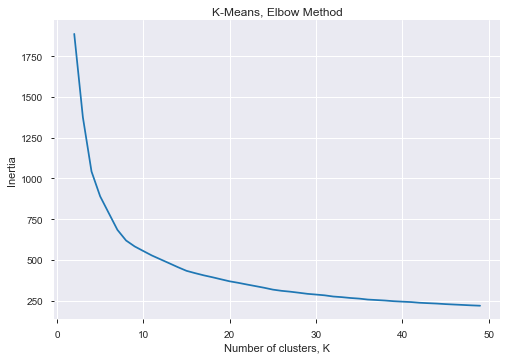

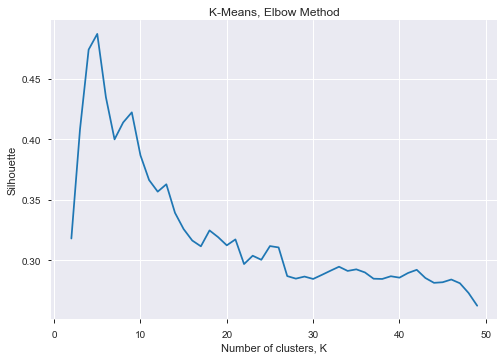

In [77]:
# trying out different K (from 2 to 50) and drawing out the elbow curves
inertias = {}
silhouettes = {}
for k in range(2, 50):
    kmeans = KMeans(init='k-means++', n_init=100, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_)

plt.figure()
plt.grid(True)
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Inertia")

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Silhouette")

plt.show()

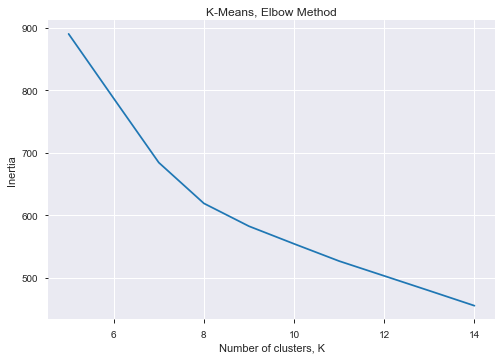

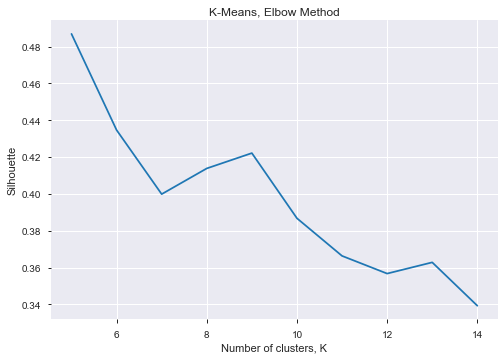

In [78]:
# trying out different K (from 5 to 15) and drawing out the elbow curves
inertias = {}
silhouettes = {}
for k in range(5, 15):
    kmeans = KMeans(init='k-means++', n_init=100, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_)

plt.figure()
plt.grid(True)
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Inertia")

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Silhouette")

plt.show()

In [84]:
# based on the graphs above, running K-Means with K = 9
kmeans = KMeans(init='k-means++', n_init=100, n_clusters=9, max_iter=1000, random_state=42).fit(X)
kmeans.fit(X)

# make a new dataframe with only numerical features
df_all_numeric = df_all[numerical_features]
print(df_all_numeric.dtypes)

# storing cluster ID as a new column of df
df_all_numeric['KMeans_Clusters'] = kmeans.labels_
df_all_numeric.head()

totalIncome                                                         float64
age                                                                   int64
DDA_balance                                                         float64
SDA_balance                                                         float64
Auto_and_Transport_monthly_spent_percentage_over_total_expenses     float64
Bills_and_Utilities_monthly_spent_percentage_over_total_expenses    float64
Entertainment_monthly_spent_percentage_over_total_expenses          float64
Food_and_Dining_monthly_spent_percentage_over_total_expenses        float64
Health_and_Fitness_monthly_spent_percentage_over_total_expenses     float64
Home_monthly_spent_percentage_over_total_expenses                   float64
Income_monthly_sum                                                  float64
Kids_monthly_spent_percentage_over_total_expenses                   float64
Mortgage_and_Rent_monthly_spent_percentage_over_total_expenses      float64
PDL_monthly_

C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,totalIncome,age,DDA_balance,SDA_balance,Auto_and_Transport_monthly_spent_percentage_over_total_expenses,Bills_and_Utilities_monthly_spent_percentage_over_total_expenses,Entertainment_monthly_spent_percentage_over_total_expenses,Food_and_Dining_monthly_spent_percentage_over_total_expenses,Health_and_Fitness_monthly_spent_percentage_over_total_expenses,Home_monthly_spent_percentage_over_total_expenses,...,Kids_monthly_spent_percentage_over_total_expenses,Mortgage_and_Rent_monthly_spent_percentage_over_total_expenses,PDL_monthly_spent_percentage_over_total_expenses,Shopping_monthly_spent_percentage_over_total_expenses,Taxes_monthly_spent_percentage_over_total_expenses,Travel_monthly_spent_percentage_over_total_expenses,DDA_monthly_total_count,SDA_monthly_total_count,total_expense_monthly_sum,KMeans_Clusters
1,40009.20,43,23102.66,16203.68,0.0,100.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.939655,0.00000,61.029310,7
2,0.00,16,10.88,111.28,0.0,0.000000,0.000000,66.970557,0.0,0.000000,...,0.0,0.000000,0.0,33.029443,0.000000,0.0,5.818966,0.12931,25.956466,1
6,11898.75,69,3211.27,4959.50,0.0,100.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.034483,0.12931,21.519828,4
7,136281.20,45,3707.11,54512.48,0.0,12.359638,3.611215,0.000000,0.0,9.466555,...,0.0,70.590785,0.0,3.971808,0.000000,0.0,1.551724,0.00000,465.468103,3
8,23638.89,26,1851.57,9655.56,0.0,25.570515,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,74.429485,0.0,2.715517,0.00000,541.706897,2


# understand clustering results

In [86]:
# finding out the feature means of each K-Means cluster and display its % and print out its silhouette_score
alg = 'KMeans_Clusters'
a = df_all_numeric.groupby(alg).count()[['age']]*100/df_all_numeric.shape[0]
a.columns = ['%']
b = df_all_numeric.groupby(alg).mean()
c = b.join(a)
print(silhouette_score(X, kmeans.labels_))
d = c.sort_values(by='age').reset_index()

# save cluster centers as a excel file
d.to_excel('kmeanscluster.xlsx')
d

0.42217647244686257


,KMeans_Clusters,totalIncome,age,DDA_balance,SDA_balance,Auto_and_Transport_monthly_spent_percentage_over_total_expenses,Bills_and_Utilities_monthly_spent_percentage_over_total_expenses,Entertainment_monthly_spent_percentage_over_total_expenses,Food_and_Dining_monthly_spent_percentage_over_total_expenses,Health_and_Fitness_monthly_spent_percentage_over_total_expenses,...,Kids_monthly_spent_percentage_over_total_expenses,Mortgage_and_Rent_monthly_spent_percentage_over_total_expenses,PDL_monthly_spent_percentage_over_total_expenses,Shopping_monthly_spent_percentage_over_total_expenses,Taxes_monthly_spent_percentage_over_total_expenses,Travel_monthly_spent_percentage_over_total_expenses,DDA_monthly_total_count,SDA_monthly_total_count,total_expense_monthly_sum,%
0,1,1211.543438,17.937500,908.462500,559.395625,0.047840,0.252563,0.020891,70.352956,0.000000,...,0.000000,0.000000,0.000000,28.031204,1.265378,0.000000,4.782618,0.036990,27.209955,10.563738
1,6,18679.054889,36.955556,8429.397889,7578.496000,0.000000,11.832686,0.122872,0.000000,0.000000,...,0.000000,0.000000,85.868163,0.086339,1.719638,0.000000,1.777299,0.051724,151.687989,2.285424
2,5,66722.157500,50.100000,39002.865000,26888.862667,0.000000,14.821219,1.292841,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.545531,3.875009,76.256679,2.002155,0.058190,295.081897,1.523616
3,8,44171.043511,50.974265,15497.714026,17815.378860,0.013358,14.656022,0.145190,0.104032,0.004419,...,0.016282,0.973114,0.577739,0.574133,81.195493,0.717654,2.325922,0.144761,1137.550052,13.814119
4,2,47449.220808,51.769536,10569.722503,19053.864424,0.000000,22.529480,0.144448,0.046560,0.000000,...,0.000000,0.508945,0.436930,0.753239,74.301757,0.244980,2.414764,0.000000,455.407193,19.172169
5,3,56736.459933,53.553333,8180.458156,22775.614578,0.002089,7.310605,0.025468,0.034537,0.000000,...,0.000000,91.131184,0.317563,0.225228,0.343156,0.000000,1.860632,0.040805,729.693621,11.427120
6,0,81061.191576,54.092391,30232.133478,32557.085326,0.000000,32.391594,5.150321,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.580470,0.685431,0.000000,1.419603,0.040761,76.765452,4.672423
7,7,40819.602729,54.319869,15017.877271,16427.814498,0.000000,96.289322,0.382825,0.118206,0.000000,...,0.000000,0.000000,0.000000,1.623904,0.307301,0.000000,1.687246,0.000000,50.401525,23.260538
8,4,39830.784704,54.694073,16664.935430,16078.502103,0.000000,94.930171,0.864230,0.088881,0.000000,...,0.000000,0.000000,0.435910,2.077888,0.314085,0.067130,1.825674,0.143403,50.330254,13.280853
